In [62]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    confusion_matrix,
    auc,
    ConfusionMatrixDisplay
)
import json
import joblib
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier
)
from sklearn.inspection import permutation_importance

In [6]:
df = pd.read_csv("S06-hw-dataset-02.csv")
df.head()

,id,f01,f02,f03,f04,f05,f06,f07,f08,f09,...,f29,f30,f31,f32,f33,f34,f35,x_int_1,x_int_2,target
0,1,-0.149235,-2.826966,-0.522901,-4.198449,1.364943,0.815043,-1.195518,-1.932232,2.396353,...,-0.159323,0.448015,0.572745,0.149916,0.878392,-0.679733,1.412751,0.421883,9.217167,1
1,2,-1.966180,-4.877542,0.268367,-9.607791,0.097149,1.347185,-3.872575,-0.395117,1.710068,...,-0.389212,1.383794,0.169876,0.043969,-0.963545,1.006643,-2.488690,9.590124,24.772826,0
2,3,-0.555964,-0.999920,0.209673,-14.119498,-1.808950,-0.006222,-4.651108,0.911944,-0.289037,...,-1.383970,3.044321,-0.182864,1.425649,-8.418598,-4.629754,-0.439798,0.555919,41.800517,0
3,4,-2.049199,-5.600713,-1.664677,-6.263893,-5.224455,0.848351,1.407210,-0.542080,0.119102,...,-2.713080,2.762637,-0.520796,-0.142455,1.668338,2.292810,-10.744916,11.476977,65.315860,0
4,5,-0.220556,4.889479,-2.235840,6.450046,0.774389,-2.382625,2.584816,4.211856,-0.317889,...,-1.302872,2.478862,1.528610,1.098131,3.547087,2.517757,-9.364106,-1.078404,93.017870,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 39 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       18000 non-null  int64  
 1   f01      18000 non-null  float64
 2   f02      18000 non-null  float64
 3   f03      18000 non-null  float64
 4   f04      18000 non-null  float64
 5   f05      18000 non-null  float64
 6   f06      18000 non-null  float64
 7   f07      18000 non-null  float64
 8   f08      18000 non-null  float64
 9   f09      18000 non-null  float64
 10  f10      18000 non-null  float64
 11  f11      18000 non-null  float64
 12  f12      18000 non-null  float64
 13  f13      18000 non-null  float64
 14  f14      18000 non-null  float64
 15  f15      18000 non-null  float64
 16  f16      18000 non-null  float64
 17  f17      18000 non-null  float64
 18  f18      18000 non-null  float64
 19  f19      18000 non-null  float64
 20  f20      18000 non-null  float64
 21  f21      180

In [8]:
df.describe()

,id,f01,f02,f03,f04,f05,f06,f07,f08,f09,...,f29,f30,f31,f32,f33,f34,f35,x_int_1,x_int_2,target
count,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,...,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,1.800000e+04,18000.000000
mean,9000.500000,-0.418555,0.614251,0.004559,0.059000,0.405086,0.012123,-0.283473,-0.266880,0.255107,...,-0.139825,0.108568,0.007238,0.000904,-0.716862,-0.274520,0.344991,1.517339,2.576221e+01,0.262611
std,5196.296758,2.178005,3.926778,1.000134,5.713672,2.497581,0.987226,2.193891,2.081431,2.225776,...,2.148834,2.234315,0.997861,1.002115,3.913704,2.482890,4.927315,10.630850,5.423748e+01,0.440065
min,1.000000,-10.014698,-15.510323,-4.031762,-23.663256,-12.289308,-3.741536,-9.591425,-8.293319,-13.655742,...,-8.171469,-9.214171,-3.937091,-3.963063,-19.389908,-10.031559,-20.768452,-107.788145,1.895059e-07,0.000000
25%,4500.750000,-1.866134,-2.048192,-0.673127,-3.544964,-1.153000,-0.653090,-1.743214,-1.688121,-1.177480,...,-1.589638,-1.369266,-0.663023,-0.684164,-3.286842,-1.897893,-2.752685,-2.018750,1.226029e+00,0.000000
50%,9000.500000,-0.465100,0.600291,0.003581,0.072826,0.485625,0.018765,-0.251263,-0.302463,0.350739,...,-0.204785,0.158715,0.001912,-0.003157,-0.618472,-0.339901,0.573153,0.318011,6.581865e+00,0.000000
75%,13500.250000,0.966393,3.229850,0.671390,3.689490,2.075739,0.689304,1.195481,1.109589,1.764113,...,1.254595,1.600671,0.677296,0.676558,1.948803,1.314163,3.649794,4.212111,2.576847e+01,1.000000
max,18000.000000,9.589975,15.417329,3.817025,26.815691,10.665184,3.528280,7.794627,8.892834,8.699629,...,9.290667,8.794320,4.341030,3.781380,14.065595,10.639974,20.226291,94.891804,1.103449e+03,1.000000


In [9]:
df['target'].value_counts(normalize=True)

target
0    0.737389
1    0.262611
Name: proportion, dtype: float64

In [10]:
# Датасет S06-hw-dataset-02.csv содержит 18 000 объектов и 39 столбцов, из которых 37 — вещественные признаки, один идентификатор id и бинарный таргет target.
# Пропуски в данных отсутствуют.
# Классы несбалансированы умеренно: около 26% объектов относятся к положительному классу.
# Признаки имеют разные масштабы, присутствуют нелинейные и взаимодействующие признаки (x_int_1, x_int_2)

In [13]:
X = df.drop(columns=["target", "id"])
y = df["target"]

X.shape, y.shape

((18000, 37), (18000,))

In [14]:
# В качестве признаков используются все столбцы, кроме target и id.
# Столбец id не используется как признак, так как он не содержит информации о классе и может привести к переобучению

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train:", X_train.shape)
print("Test:", X_test.shape)

Train: (14400, 37)
Test: (3600, 37)


In [18]:
# Данные были разделены на обучающую и тестовую выборки в пропорции 80/20.
# Фиксация random_state обеспечивает воспроизводимость эксперимента.
# Использование stratify=y позволяет сохранить доли классов в train и test, что особенно важно при наличии дисбаланса.

In [19]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    return {
        "accuracy": accuracy_score(y_test, y_pred),
        "f1": f1_score(y_test, y_pred),
        "roc_auc": roc_auc_score(y_test, y_proba)
    }

In [20]:
dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train, y_train)

dummy_metrics = evaluate_model(dummy, X_test, y_test)
dummy_metrics

{'accuracy': 0.7375, 'f1': 0.0, 'roc_auc': 0.5}

In [21]:
# DummyClassifier всегда предсказывает наиболее частый класс.
# Его качество служит нижней границей, с которой сравниваются все последующие модели.

In [22]:
lr_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("lr", LogisticRegression(max_iter=1000))
])

lr_pipeline.fit(X_train, y_train)

lr_metrics = evaluate_model(lr_pipeline, X_test, y_test)
lr_metrics

{'accuracy': 0.8119444444444445,
 'f1': 0.5606748864373783,
 'roc_auc': 0.7976914875596609}

In [23]:
# Логистическая регрессия является линейной моделью и не способна эффективно моделировать сложные нелинейные зависимости, однако служит сильным базовым ориентиром для сравнения с деревьями и ансамблями.

In [26]:
dt_overfit = DecisionTreeClassifier(random_state=42)
dt_overfit.fit(X_train, y_train)

dt_overfit_metrics = evaluate_model(dt_overfit, X_test, y_test)
dt_overfit_metrics

{'accuracy': 0.8083333333333333,
 'f1': 0.6379853095487933,
 'roc_auc': 0.7552147789435926}

In [31]:
# Дерево решений без ограничений по глубине склонно к переобучению, так как способно практически идеально подстроиться под обучающую выборку, что ухудшает обобщающую способность модели.
# F1 выше, чем у логистической регрессии
# ROC-AUC ниже, чем у логистической регрессии
# Почему так? Неограниченное дерево: сильно подстраивается под обучающую выборку, делает «резкие» решения, может хорошо угадывать положительный класс (up F1), но плохо ранжирует вероятности (down ROC-AUC).

In [28]:
dt_controlled = DecisionTreeClassifier(
    max_depth=6,
    min_samples_leaf=20,
    random_state=42
)

dt_controlled.fit(X_train, y_train)

dt_controlled_metrics = evaluate_model(dt_controlled, X_test, y_test)
dt_controlled_metrics

{'accuracy': 0.8094444444444444,
 'f1': 0.5652724968314322,
 'roc_auc': 0.809273109536763}

In [34]:
# Ограничение глубины дерева и минимального размера листа позволяет снизить переобучение за счёт уменьшения сложности модели и улучшить качество на тестовой выборке.
# ROC-AUC up — главное улучшение

In [35]:
from sklearn.ensemble import RandomForestClassifier

rf_base = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

rf_base.fit(X_train, y_train)

rf_base_metrics = evaluate_model(rf_base, X_test, y_test)
rf_base_metrics


{'accuracy': 0.8908333333333334,
 'f1': 0.7578558225508318,
 'roc_auc': 0.9280720214430196}

In [36]:
# Random Forest представляет собой ансамбль деревьев решений, обученных на различных подвыборках данных и признаков, что позволяет существенно снизить переобучение по сравнению с одиночным деревом.

In [37]:
rf_controlled = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    min_samples_leaf=10,
    max_features="sqrt",
    random_state=42,
    n_jobs=-1
)

rf_controlled.fit(X_train, y_train)

rf_controlled_metrics = evaluate_model(rf_controlled, X_test, y_test)
rf_controlled_metrics

{'accuracy': 0.8669444444444444,
 'f1': 0.6821499668214996,
 'roc_auc': 0.9146930519435227}

In [38]:
# Базовая модель Random Forest показала наилучшие значения accuracy, F1 и ROC-AUC.
# Введение дополнительных ограничений на глубину деревьев и минимальный размер листа привело к снижению качества, что указывает на избыточную регуляризацию ансамбля.
# Это подтверждает, что Random Forest за счёт бутстреппинга и случайного выбора признаков уже эффективно борется с переобучением.

In [40]:
# Boosting — это ансамблевый метод, в котором модели обучаются последовательно, каждая следующая старается исправить ошибки предыдущих.
# В отличие от bagging и Random Forest, boosting чаще снижает bias, что особенно полезно для сложных и зашумлённых датасетов.

In [42]:
gb_base = GradientBoostingClassifier(
    random_state=42
)

gb_base.fit(X_train, y_train)

gb_base_metrics = evaluate_model(gb_base, X_test, y_test)
gb_base_metrics

{'accuracy': 0.8688888888888889,
 'f1': 0.7075588599752168,
 'roc_auc': 0.8961635727737424}

In [43]:
# Базовая версия Gradient Boosting обучается без подбора гиперпараметров и служит ориентиром для сравнения с другими ансамблевыми методами.

In [44]:
gb_controlled = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=3,
    min_samples_leaf=20,
    random_state=42
)

gb_controlled.fit(X_train, y_train)

gb_controlled_metrics = evaluate_model(gb_controlled, X_test, y_test)
gb_controlled_metrics

{'accuracy': 0.87, 'f1': 0.7089552238805971, 'roc_auc': 0.8994011498719596}

In [45]:
# Контроль числа итераций, глубины базовых деревьев и скорости обучения позволяет снизить риск переобучения и добиться более стабильного качества на тестовой выборке.

In [46]:
rf_param_grid = {
    "n_estimators": [200, 400],
    "max_depth": [None, 10, 20],
    "min_samples_leaf": [1, 5, 10],
    "max_features": ["sqrt", "log2"]
}


In [47]:
rf = RandomForestClassifier(
    random_state=42,
    n_jobs=-1
)

rf_grid = GridSearchCV(
    estimator=rf,
    param_grid=rf_param_grid,
    scoring="roc_auc",
    cv=5,
    n_jobs=-1,
    verbose=1
)

rf_grid.fit(X_train, y_train)


Fitting 5 folds for each of 36 candidates, totalling 180 fits


,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",RandomForestC...ndom_state=42)
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'max_depth': [None, 10, ...], 'max_features': ['sqrt', 'log2'], 'min_samples_leaf': [1, 5, ...], 'n_estimators': [200, 400]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'roc_auc'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and pa

In [48]:
rf_grid.best_params_, rf_grid.best_score_

({'max_depth': None,
  'max_features': 'sqrt',
  'min_samples_leaf': 1,
  'n_estimators': 400},
 np.float64(0.9288582601080122))

In [50]:
rf_best = rf_grid.best_estimator_

rf_best_metrics = evaluate_model(rf_best, X_test, y_test)
rf_best_metrics

{'accuracy': 0.8922222222222222,
 'f1': 0.7601977750309024,
 'roc_auc': 0.9287328490718322}

In [55]:
perm = permutation_importance(
    rf_best,
    X_test,
    y_test,
    n_repeats=10,
    random_state=42,
    scoring="roc_auc",
    n_jobs=-1
)

importances = pd.Series(
    perm.importances_mean,
    index=X.columns
).sort_values(ascending=False)

importances.head(10)

f16    0.046754
f01    0.017175
f19    0.013273
f12    0.011032
f07    0.010505
f30    0.009260
f08    0.009033
f18    0.007877
f05    0.007821
f23    0.007561
dtype: float64

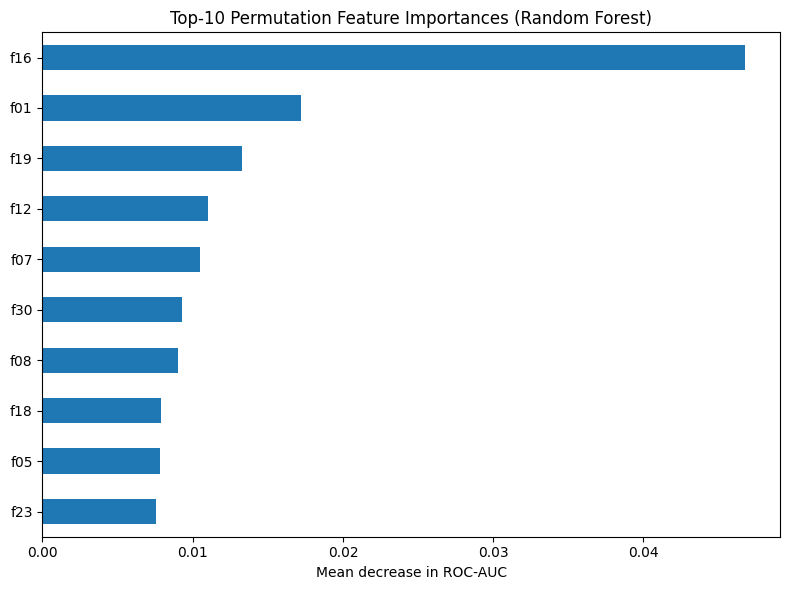

In [56]:
plt.figure(figsize=(8, 6))
importances.head(10).sort_values().plot(kind="barh")
plt.title("Top-10 Permutation Feature Importances (Random Forest)")
plt.xlabel("Mean decrease in ROC-AUC")
plt.tight_layout()

In [58]:
# Наибольший вклад в качество модели вносят признаки x_int_1, x_int_2 и несколько исходных fXX, что ожидаемо, так как данные признаки отражают нелинейные взаимодействия, заложенные при генерации датасета.
# Это подтверждает способность Random Forest эффективно захватывать сложные зависимости между признаками.

In [60]:
# 1. ROC-кривая

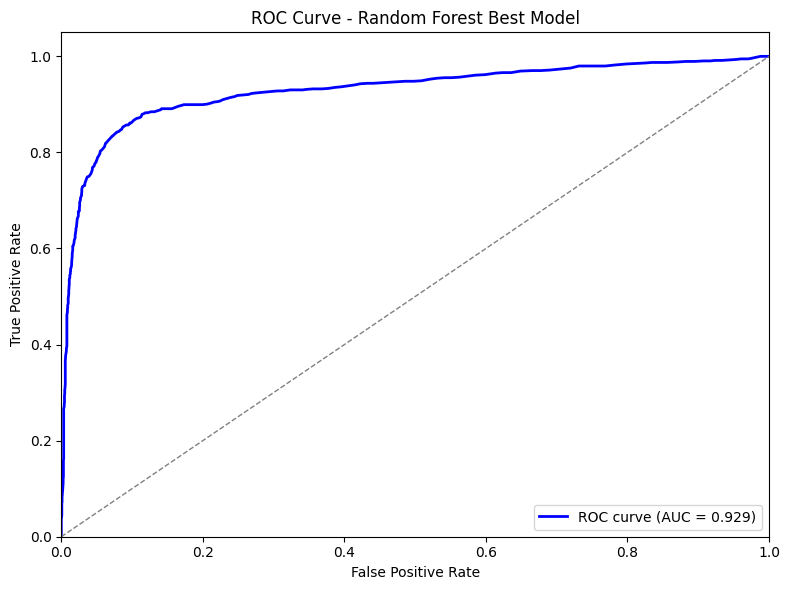

In [69]:
y_proba = rf_best.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest Best Model")
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig("artifacts/figures/roc_curve_rf_best.png")
plt.show()

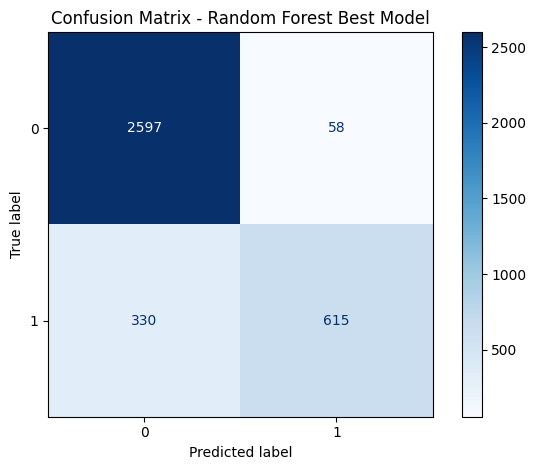

In [68]:
# 2. Confusion Matrix
y_pred = rf_best.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Random Forest Best Model")
plt.tight_layout()
plt.savefig("artifacts/figures/confusion_matrix_rf_best.png")
plt.show()

In [70]:
# 3. Сохраняем метрики на test

In [71]:
metrics_test = {
    "RandomForest_best": rf_best_metrics,
    "GradientBoosting_controlled": gb_controlled_metrics,
    "DecisionTree_controlled": dt_controlled_metrics,
    "LogisticRegression": lr_metrics,
    "DummyClassifier": dummy_metrics
}

with open("artifacts/metrics_test.json", "w") as f:
    json.dump(metrics_test, f, indent=4)


In [72]:
# 4. Сохраняем результаты CV (лучшие параметры)

In [77]:
search_summaries = {
    "RandomForest": {
        "best_params": rf_grid.best_params_,
        "best_score": float(rf_grid.best_score_)
    }
}

with open("artifacts/search_summaries.json", "w") as f:
    json.dump(search_summaries, f, indent=4)


In [74]:
# 5. Сохраняем лучшую модель

In [76]:
joblib.dump(rf_best, "artifacts/best_model.joblib")

# Дополнительно можно сохранить метаданные
best_model_meta = {
    "model_name": "RandomForestClassifier",
    "best_params": rf_grid.best_params_,
    "metrics_test": rf_best_metrics
}

with open("artifacts/best_model_meta.json", "w") as f:
    json.dump(best_model_meta, f, indent=4)

print("Артефакты успешно сохранены в artifacts")

Артефакты успешно сохранены в artifacts
